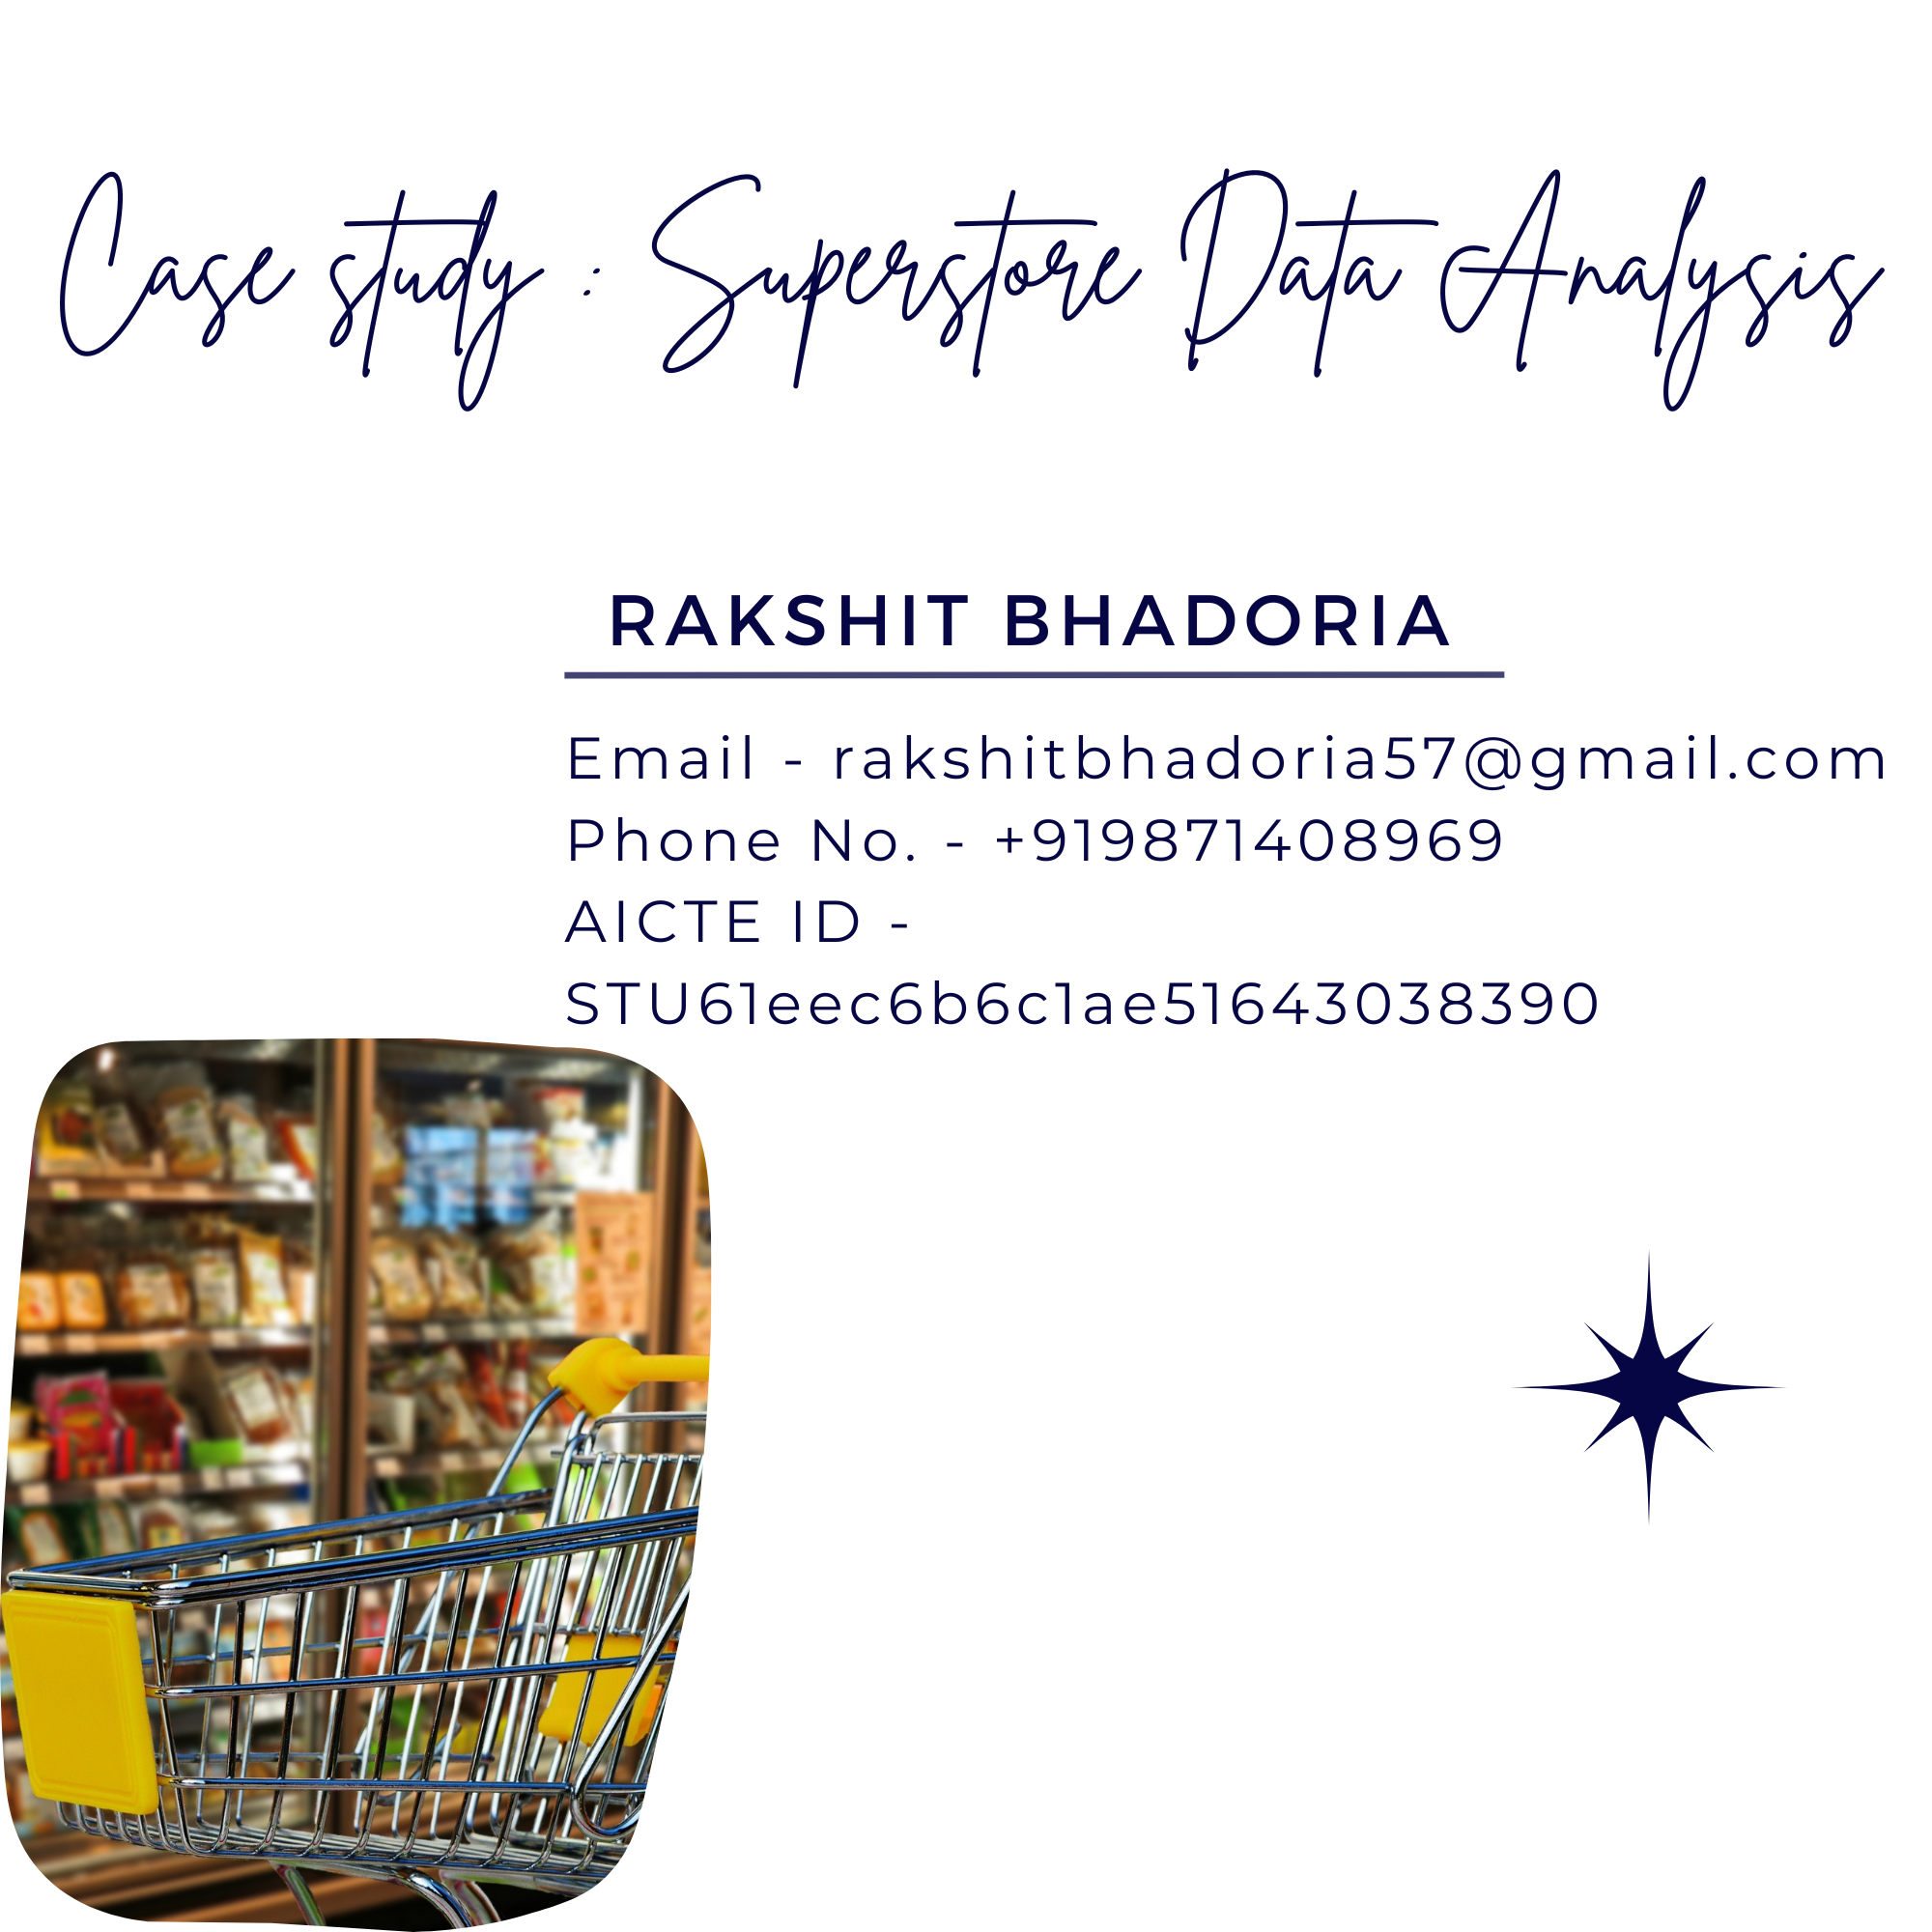

#**Summary**
In this project, we will be analyzing a dataset from a sample superstore to gain insights on how to increase profits and minimize losses. The dataset represents a simulation of a superstore's operations, and our objective is to perform Exploratory Data Analysis (EDA) to identify areas of weakness that can be targeted for improvement.

#**Task**
As a business manager, goal is to conduct an in-depth analysis of the 'SampleSuperstore' dataset. By exploring the data and focusing on profit-related factors such as 'Sales' and 'Profit' (measured in USD), as well as the 'Quantity' of products sold and the 'Discount' percentage applied to each transaction, we aim to identify the weak areas in the sales department. This analysis will provide valuable insights and recommendations for enhancing sales performance and overall profitability.

#**About Dataset Used**
The provided sample data used for Exploratory Data Analysis (EDA) was obtained from the Spark Foundation and is also available on Kaggle, uploaded by Aman Sharma.

This dataset, known as the **"Sample Superstore dataset,"** encompasses a wide range of information, including the type of products sold, their respective locations of sale, and the details of their shipping processes.

#**Overview of dataset**
The dataset contains 13 columns with the following information:

**1. Ship Mode:** This column represents the mode of shipping used for shipment delivery.

**2. Segment:** This categorical column indicates the customer segment to which the product was shipped.

**3. Country:** This column specifies the country in which the shipment was delivered.

**4. City:** This column provides the city where the shipment was delivered.

**5. State:** This column indicates the state where the shipment was delivered.

**6. Postal Code:** This column contains the postal code to which the shipment was delivered.

**7. Region:** This column represents the region within the country.

**8. Category:** This column denotes the category to which the product belongs.

**9. Sub-Category:** This column specifies the sub-category of the product.

**10. Sales:** This column represents the sale amount in USD.

**11. Quantity:** This column indicates the quantity of the product sold.

**12. Discount:** This column indicates the discount given on the product.

**13. Profit:** This column represents the profit or loss made on the sale.

# **Libraries Used**
The Libraries used in this project are :
> **Pandas** is a library for manipulating and analyzing data that is very strong. It has data structures like DataFrame that make it easy to handle and work with data.

>**Numpy** is one of the most important Python libraries for science computing. It can work with large arrays and matrices with many dimensions, and it has a wide range of mathematical functions that can be used to work with these arrays quickly.

>**Warnings** gives you a way to deal with warning messages. It lets you decide how warnings in your code are shown or treated.

>**Matplotlib** is a popular Python tool for making plots. It lets you make high-quality static, animated, and live visualizations with a wide range of tools. It is often used with NumPy and pandas to make data easier to see.

>**Plotly** is a web-based, interactive tool for making graphs and charts. It lets you make dynamic plots, charts, and dashboards that you can put into web apps or look at in Jupyter notebooks. Plotly lets you make many different kinds of charts and gives you ways to interact with them, like zooming, moving, and tooltips.

>**Seaborn** Based on matplotlib, seaborn is a tool for displaying data. It gives you a more advanced interface for making statistical graphics that are both useful and nice to look at. Seaborn makes it easier to make complicated visualizations and supports many different kinds of plots, such as scatter plots, line plots, bar plots, and more.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv("/content/SampleSuperstore.csv")

In [ ]:
data

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.shape

(9994, 13)

There are **9994 rows and 13 columns** in dataset.

Firstly, we verify if there are any **null values** present in the dataset.

In [ ]:
data.dtypes.to_frame()

0
Ship Mode      object
Segment        object
Country        object
City           object
State          object
Postal Code     int64
Region         object
Category       object
Sub-Category   object
Sales         float64
Quantity        int64
Discount      float64
Profit        float64

Currently, the dataset has 9994 rows of records and 13 columns of attributes. These attributes have 8 qualitative discrete categorical variables (represented as objects or strings), 2 quantitative discrete numerical variables (represented as integers), and 3 quantitative continuous numerical variables (represented as floats).

# **Data Pre-Processing**

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Upon inspection, it is evident that all the columns are **devoid of null values**.

Next, we proceed to examine whether there are **any duplicate rows** within the dataset.

In [ ]:
duplicate_rows = data[data.duplicated()]
num_duplicates = len(duplicate_rows)

if num_duplicates > 0:
    print("There are duplicate rows in the dataset.")
    print("Number of duplicate rows:", num_duplicates)
else:
    print("No duplicate rows found in the dataset.")

There are duplicate rows in the dataset.
Number of duplicate rows: 17


Upon inspection, it has been found that there are duplicate rows present.
**Number of duplicate rows: 17**

To ensure data integrity and accuracy, We will proceed to remove these duplicate rows from the dataset.

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [ ]:
data.shape

(9977, 13)

After getting rid of the duplicate numbers, we can see that there are **now 9977 rows** in the new dataset. The original collection, on the other hand, had 9997 rows.

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Data Reduction**

We can decrease the number of dimensions in our data by getting rid of the variable "Country," which has the same value for every record: "United States." We can also leave out the "Postal Code" variable from our data analysis because we already have the "Cities" variable.

In [ ]:
data=data.drop(['Country','Postal Code'], axis=1)

>Now, before we move on to the analysis step, let's take a look at our cleaned dataset.

In [ ]:
data

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9972    Second Class   Consumer            Miami     Florida  South   
9973  Standard Class   Consumer       Costa Mesa  California   West   
9974  Standard Class   Consumer       Costa Mesa  California   West   
9975  Standard Class   Consumer       Costa Mesa  California   West   
9976    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category     Sales  Quantity  Discount    Profit  
0           Furniture    Bookcases  261.9600         2      0.00   41.9136  
1           Furniture       Chairs  731.9400         3      0.00  219.5820  
2     Office Supplies       Labels   14.6200         2      0.00    6.8714  
3           Furniture       Tables  957.5775         5      0.45 -383.0310  
4     Office Supplies      Storage   22.3680         2      0.20    2.5164  
...               ...          ...       ...       ...       ...       ...  
9972        Furniture  Furnishings   25.2480         3      0.20    4.1028  
9973        Furniture  Furnishings   91.9600         2      0.00   15.6332  
9974       Technology       Phones  258.5760         2      0.20   19.3932  
9975  Office Supplies        Paper   29.6000         4      0.00   13.3200  
9976  Office Supplies   Appliances  243.1600         2      0.00   72.9480  

[9977 rows x 11 columns]

# **Analyze Phase**
##**Dataset Exploration**

In [ ]:
data.describe(include="all")

Ship Mode   Segment           City       State Region  \
count             9977      9977           9977        9977   9977   
unique               4         3            531          49      4   
top     Standard Class  Consumer  New York City  California   West   
freq              5955      5183            914        1996   3193   
mean               NaN       NaN            NaN         NaN    NaN   
std                NaN       NaN            NaN         NaN    NaN   
min                NaN       NaN            NaN         NaN    NaN   
25%                NaN       NaN            NaN         NaN    NaN   
50%                NaN       NaN            NaN         NaN    NaN   
75%                NaN       NaN            NaN         NaN    NaN   
max                NaN       NaN            NaN         NaN    NaN   

               Category Sub-Category         Sales     Quantity     Discount  \
count              9977         9977   9977.000000  9977.000000  9977.000000   
unique                3           17           NaN          NaN          NaN   
top     Office Supplies      Binders           NaN          NaN          NaN   
freq               6012         1522           NaN          NaN          NaN   
mean                NaN          NaN    230.148902     3.790719     0.156278   
std                 NaN          NaN    623.721409     2.226657     0.206455   
min                 NaN          NaN      0.444000     1.000000     0.000000   
25%                 NaN          NaN     17.300000     2.000000     0.000000   
50%                 NaN          NaN     54.816000     3.000000     0.200000   
75%                 NaN          NaN    209.970000     5.000000     0.200000   
max                 NaN          NaN  22638.480000    14.000000     0.800000   

            Profit  
count   9977.00000  
unique         NaN  
top            NaN  
freq           NaN  
mean      28.69013  
std      234.45784  
min    -6599.97800  
25%        1.72620  
50%        8.67100  
75%       29.37200  
max     8399.97600

There may be "NaN" in some of the classified columns, which is fine. Since categorical values aren't meant to be used for calculations, they can disregarded.

It's very important to know the exact number and frequency of the categorical variables. Let's analyze the data in detail.

Analysis:

1. Categorical Features:
   - Total number of rows: 9977
   
   Ship Modes:
   - "Standard class" has the highest frequency, with over 5,955 orders, accounting for roughly 60% of business orders.
   
   Buyer Segments:
   - The "Consumer" segment contributes to more than 50% of sales, with a repetition of 5183 times.
   
   Product Categories:
   - There are three main product categories and seventeen sub-categories.
   - "Office supplies" is the most ordered category, with 6,012 orders, representing 58% of all records.
   - The most popular item in the "Office supplies" category is "Binders," with 1,522 orders, accounting for 15.2% of the dataset.
   
   Geographic Information:
   - The data was collected from 4 regions, 49 states, and 531 cities across the United States.
   - The majority of orders came from the following locations:
     - "West Region" with 3,193 orders
     - "California" state with 1,996 orders
     - "New York City" with 914 orders

2. Numerical Features:
   - Average sales across all records: 230.14 USD
   - Minimum sales: 0.44 USD
   - Maximum sales: 22,638.48 USD
   
   Quantity:
   - Average quantity sold: 3-4 items per sale
   - Maximum quantity sold: 14 items
   
   Discount:
   - Average discount provided: 15-20%
   - Maximum discount provided: 80%
   
   Profit:
   - Average profit per sale: 28.77 USD
   - Minimum loss: -6,599 USD
   - Maximum profit: 8,399 USD
   
   Now let's analyze the numerical features that affect profits.

## **How does Sales, Quantity and Discount affects SuperStores Profits?**

To figure out how sales, quantity, and discounts affect SuperStores' profits, we can make a "heatmap" that shows how the numbers in each column relate to each other.

By looking at the heatmap, we can see how the variables are related and if there are any trends. The heatmap will show how changes in sales, quantity, and discount amounts affect SuperStores' profits.

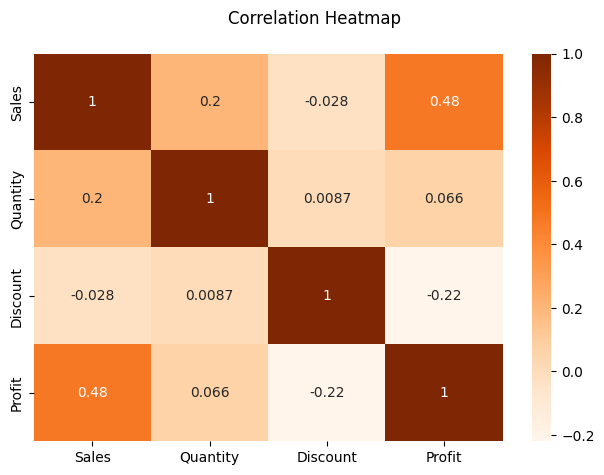

In [ ]:
cmap=data
cmap["Profit"]=cmap["Profit"]
sns.heatmap(cmap.corr(), cmap = 'Oranges' ,annot = True)
plt.suptitle("Correlation Heatmap")
plt.tight_layout()

The analysis conducted focuses on the relationship between sales, discount, quantity, and profit in order to gain insights into their impact on the overall profitability of Superstore. The findings of the analysis are as follows:

**1. Sales and Profit:**
The data clearly indicates a positive correlation between sales and profit. As sales increase, profits also increase. This relationship is expected, as higher sales typically lead to higher revenue and subsequently higher profits. Therefore, efforts to increase sales could have a direct positive impact on the company's profitability.

**2. Discount and Profit:**
The analysis reveals a negative correlation between discounts and profit. This implies that as discounts are offered on sales, the profit margins decrease. While discounts may attract customers and increase sales, they can also erode profit margins if not carefully managed. Superstore needs to evaluate its discount strategy to ensure it does not negatively impact overall profitability.

**3. Sales and Quantity:**
The data shows a positive correlation between sales and quantity, indicating that as the quantity of items sold increases, the sales also tend to increase. However, the correlation between sales and quantity appears to be weak. This suggests that other factors besides quantity may influence sales, such as pricing, marketing efforts, or customer preferences. Superstore should explore these factors further to enhance the relationship between quantity and sales.

**4. Discount and Sales/Quantity:**
Surprisingly, the analysis reveals little to no difference in sales and quantity due to discounts. This suggests that the discount strategy employed by Superstore may not be effective for certain items. It is crucial for the company to reassess its discount strategy and identify which products or categories would benefit the most from discounts. Alternatively, Superstore may need to explore alternative strategies to attract customers and drive sales.

Based on the analysis, it is evident that sales and discount have a significant impact on profit, with sales positively influencing profit and discounts having a negative effect. Additionally, the correlation between sales and quantity, although positive, appears to be weak. Superstore should consider these findings and take necessary steps to optimize its sales and discount strategies to improve overall profitability.

## **Does offering a discount boost sales?**

adding 2 additional columns

we will now add two new Feature/Columns to our dataset that shows the price of "per item" and amount profit/loss made on that item

In [ ]:
data['Unit Price'] = data.Sales / data.Quantity

data['Unit Profit'] =data.Profit / data.Quantity

In [ ]:
sales_discount=data
sales_discount['whether_discount'] = sales_discount.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = sales_discount.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(107,44,107)', 'rgb(236,140,108)']
    if data_type == 'average':
        discount_data = sales_discount.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = sales_discount.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data["Unit Price"], marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()


discount_plotter('average')
discount_plotter()

The analysis of the provided plots reveals several observations regarding the sales and profitability of the Superstore, particularly in relation to discounted and non-discounted products. Here are the key findings:

1. Sales Patterns:
   - Average sales indicate that customers are more inclined to purchase products when they are offered at a lower price. On average, a discounted sale amounts to approximately USD 232, compared to the undiscounted price of USD 227.
   - Despite a slightly lower average quantity per transaction (3.77) for sales involving discounts compared to non-discounted sales (3.81), the overall sales volume is higher when discounts are offered. The difference amounts to approximately 1.3k additional products sold when discounts are available.

2. Profitability:
   - Non-discounted sales result in a total profit of around USD 320K, whereas discounted sales lead to a loss of about USD 34K. This indicates that offering discounts negatively impacts the Superstore's overall profitability.
   - On average, the sale of a discounted product incurs a loss of approximately USD 1, whereas non-discounted products generate a profit of around USD 18 per sale.
   - The Superstore experienced an overall loss of about USD 35K due to discounts, compared to a profit of approximately USD 321K when discounts were not offered.

3. Pricing:
   - The average price of a discounted item is approximately USD 62, while non-discounted items have an average price of approximately USD 58. This suggests that customers are willing to pay slightly more for non-discounted products.

4. Recommendations:
   - Despite the negative impact on profitability, the Superstore is compelled to offer discounts due to the significance of holidays, end-of-season sales, and clearance sales. These promotional events help the store make room for new inventory and attract more customers, leading to future profits.
   - Instead of focusing on increasing overall discount levels to minimize losses, the Superstore is advised to consider other promotional techniques to drive profitable sales and secure long-term customer loyalty.
   - It is recommended to decrease the total discount offered while ensuring that various promotional strategies are implemented to maintain a steady stream of customers and achieve sustainable gains.


## **Buyers Diversity in "Ship Mode"**

Ship mode refers to the method of shipping goods, which involves a combination of a shipping carrier and the corresponding service provided by that carrier. Our SuperStore offers four shipping modes, namely "Standard Class," "First Class," "Second Class," and "Same Day."

Let's explore some key questions regarding this feature:

1. What is the most popular ship mode among buyers?

2. Which segment of buyers utilizes each ship mode the most?

3. Does the quantity or type of an item impact the buyer's preference for a specific shipping mode?

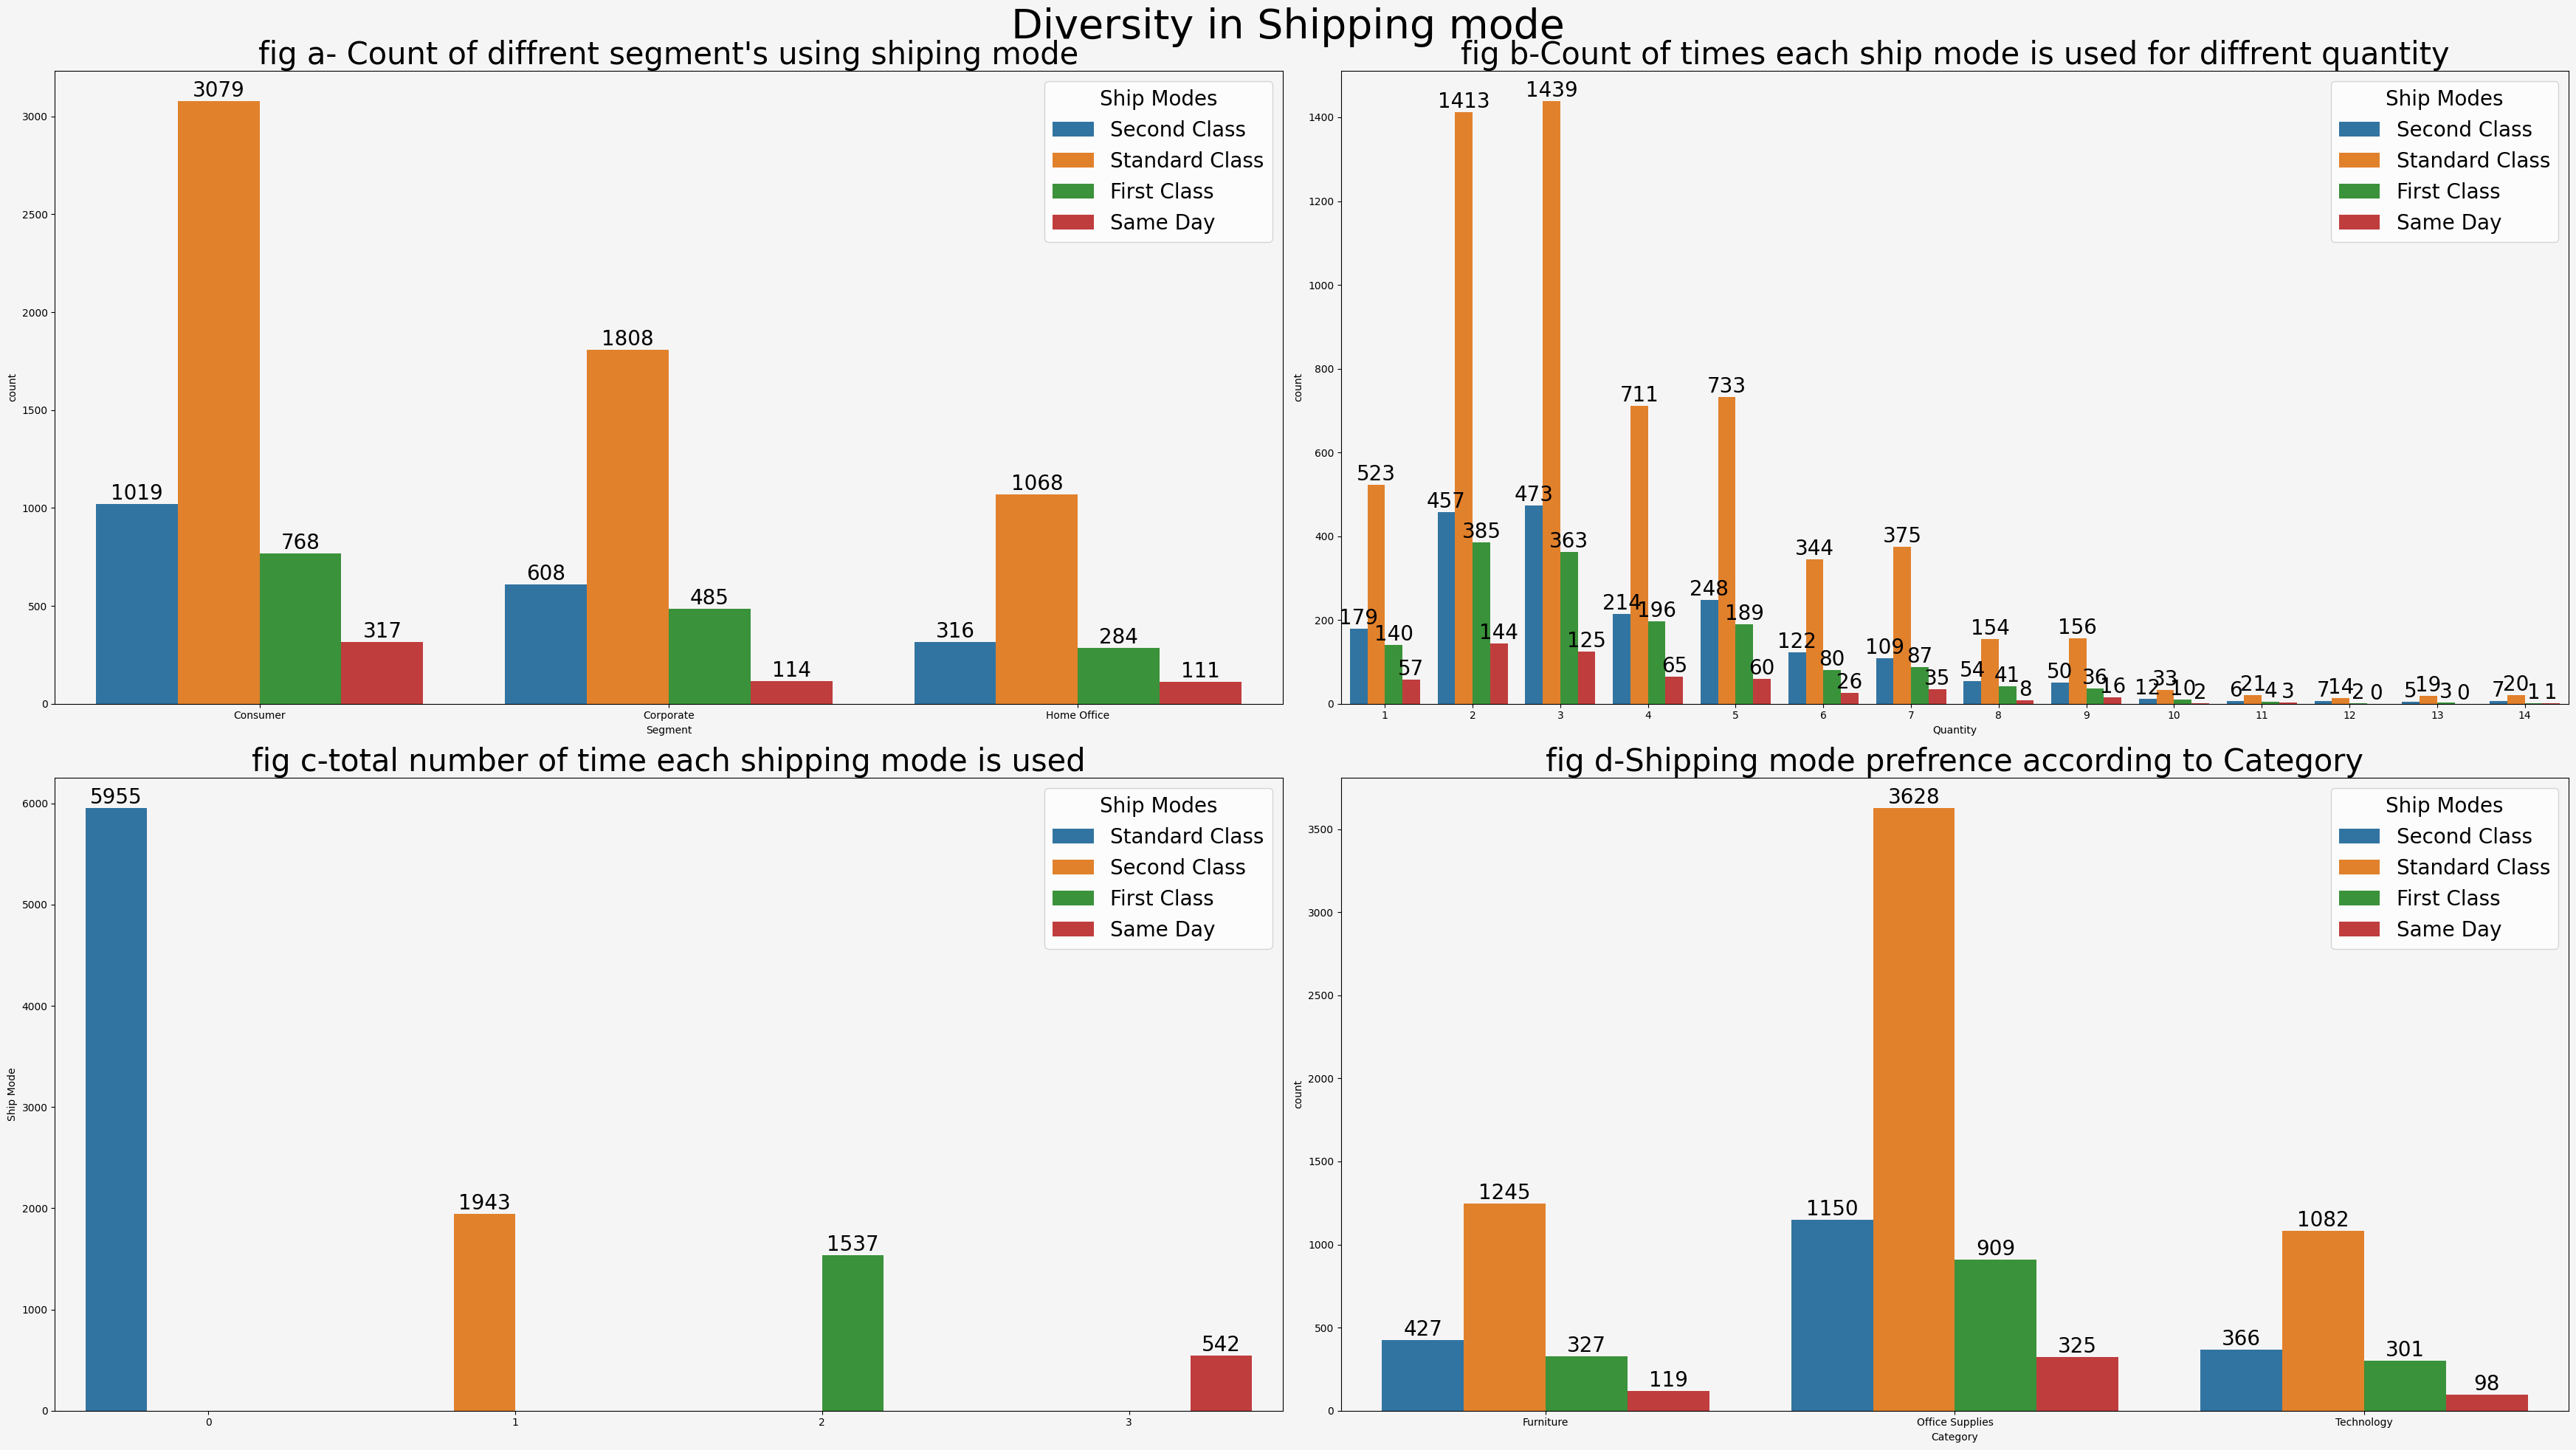

In [ ]:
ship=ship=data["Ship Mode"].value_counts().reset_index()
fig, axs = plt.subplots(2,2,figsize=(35,20))
fig.patch.set_facecolor('#f6f5f5')
sns.countplot(data=data, x = "Segment",hue="Ship Mode",ax=axs[0][0])
sns.countplot(data=data, x = "Quantity",hue="Ship Mode",ax=axs[0][1])
sns.barplot(data=ship, x = ship.index,y="Ship Mode",hue="index",ax=axs[1][0])
sns.countplot(data=data,x="Category",hue="Ship Mode",ax=axs[1][1])

axs[0][0].set_title("fig a- Count of diffrent segment's using shiping mode",fontsize=30)
axs[0][0].set_facecolor('#f6f5f5')

axs[0][1].set_title("fig b-Count of times each ship mode is used for diffrent quantity",fontsize=30)
axs[0][1].set_facecolor('#f6f5f5')

axs[1][0].set_title("fig c-total number of time each shipping mode is used",fontsize=30)
axs[1][0].set_facecolor('#f6f5f5')

axs[1][1].set_title("fig d-Shipping mode prefrence according to Category",fontsize=30)
axs[1][1].set_facecolor('#f6f5f5')

for m in range(2):
    for n in range(2):
        axs[m][n].legend(fontsize = '11',
           title = 'Ship Modes', title_fontsize = '20',
           prop={'size': 20},
           loc="upper right")
        for i in axs[m][n].containers:
            axs[m][n].bar_label(i, fontsize=20)


plt.suptitle("Diversity in Shipping mode",fontsize=40)



plt.tight_layout()

**1.What is the most popular ship mode among buyers?**

> When analyzing the popularity of different ship modes among buyers, it is evident that the **"Standard Class"** mode of shipping is the most preferred. Approximately 60% of the items purchased from Superstore are shipped using this mode. Following closely behind are the **"Second Class"** and **"First Class"** modes, with a difference of only 410 orders between them. The least preferred mode of shipping is the **"Same Day"** mode. The preference for the **"Standard Class"** mode can be attributed to its affordability compared to other modes that offer different services at higher costs (Fig. c).

**2.Which segment of buyers utilizes each ship mode the most?**

>Upon examining the favoritism of ship modes by different segments, it is evident that the **"Standard Class"** mode is preferred by all segments of Superstore customers (Fig. a). However, there is no notable difference in ship mode preference among specific segments, indicating that the choice of shipping mode is not influenced by the customer's segment.

**3.Does the number or kind of an item affect the buyer's preference for shipping?**

>The analysis of item quantity and type reveals that they do not significantly affect the buyer's preference for a particular shipping mode. The proportions of orders shipped using each mode across three categories (Fig. b & Fig. d) remain similar, indicating that the number or type of items being shipped does not play a significant role in determining the preferred shipping mode.

In conclusion, the **"Standard Class"** mode of shipping is the most popular among buyers, irrespective of their segment. Factors such as cost, urgency, item value, size, and weight should be considered when choosing a shipping mode. However, the analysis does not establish a direct correlation between the chosen shipping mode and revenue or sales.

## **observe the effect of discounts on profit/loss.**

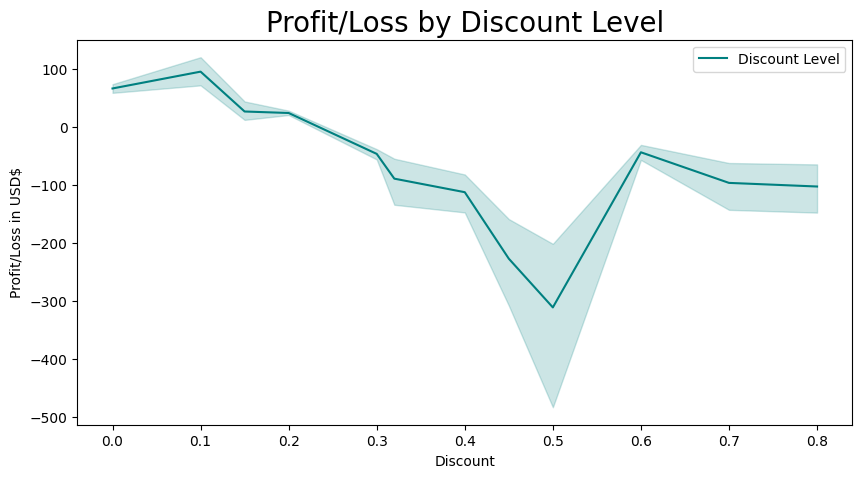

In [ ]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot(x=data['Discount'],y= data['Profit'], data =data , color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

Analysis Report:

This analysis focuses on the impact of discount levels on Superstore's profitability and brand image. Several key findings have emerged from the data, shedding light on the effectiveness of different discount strategies.

**1. Higher Discounts Lead to Losses and Negative Consumer Perception:**
>The analysis reveals that discount levels above 20% are likely to result in losses for Superstore. This implies that reducing the occurrences of lowered prices after discount deductions can generate profits within the 0% to 20% discount range. Additionally, it is observed that higher discounts tend to encourage negative consumer psychology. Customers may associate such deep discounts with product defects or low quality. Consequently, this perception can have long-term consequences for Superstore's brand image.

**2. The Impact of Different Discount Levels:**
>The worst losses were incurred when the discount level approached 50%. This suggests that certain events, such as festivals, end-of-season sales, or clearance sales for older designs, may be driving these significant losses. Superstore should carefully evaluate the effectiveness and profitability of these particular discount strategies and consider alternative approaches.

**3. Optimal Profitability with Discounts Below 10%:**
>The analysis highlights that Superstore achieves the highest profitability when discount levels are below 10%. By offering discounts at this range, the occurrence of lowered prices after discount deductions is reduced, leading to larger profit margins and overall profits. This finding emphasizes the importance of strategic pricing and suggests that Superstore should consider implementing more moderate discount levels to optimize profitability.

**Recommendations:**
>Based on the analysis findings, it is advised that Superstore explores alternative promotional strategies beyond high discount levels. These strategies should focus on improving profitability while preserving the brand image. Exploring options such as targeted promotions, personalized offers, or loyalty programs could be effective in increasing sales without relying heavily on deep discounts. By diversifying their promotional tactics, Superstore can better position themselves in the market and maintain a positive brand perception among customers.

It is important for Superstore to closely monitor their discounting practices and conduct periodic analyses to ensure that their promotional strategies align with their financial goals and customer expectations.

## **Which Category is Best Selling and Most Profitable?**

In [ ]:
df1 = pd.DataFrame(data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

df1

Sales       Profit  Quantity
Category                                           
Furniture        741306.3133   18421.8137      8020
Office Supplies  718735.2440  122364.6608     22861
Technology       836154.0330  145454.9481      6939

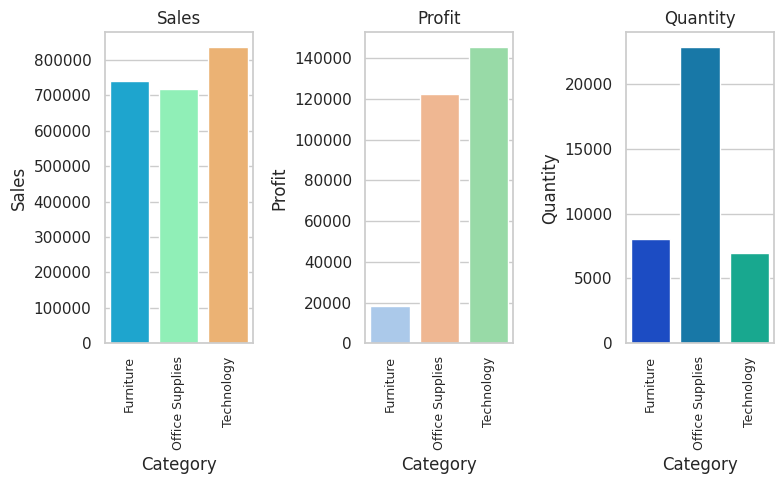

In [ ]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

The analysis focused on three categories: Furniture, Office Supplies, and Technology, with a primary objective of understanding their sales performance. Here are the key findings:

**1. Sales performance**
>All three categories—furniture, office supplies, and technology—brought in about the same amount of money. But sales in the Technology area were a lot higher than sales in the other two categories.

**2.Best selling Category**
>The best-selling area turned out to be technology, which did better than both furniture and office supplies. This shows that customers want a lot of technological goods.

**3. Profitability**
>The analysis showed that not only was the Technology category the most popular, but it also made the most money. This means that the profit margin on technology goods is higher than the margins on products in the other two categories.

**4.Sales Quantity**
>There weren't that many items sold in the Technology area. This is because technology goods are usually thought of as one-time purchases with a longer life span, usually 4 to 5 years. Even though the number of items sold is smaller, the high profit makes up for it.

**5.Furniture**
>Even though Furniture had the same number of sales as the other groups, it made the least money. This means that the furniture category has a lower profit margin per unit sold than the other categories.

**6. Office Supplies**
>In terms of how much was sold, Office Supplies came out on top. This is because office products aren't very expensive, making them easier for customers to buy.

**Recommendation**
>Based on these results, it would be best to focus on the Technology area because it sells well and makes money. But there should also be work done to find ways to make furniture more profitable and to improve the sales plan for office supplies, which have lower profit margins.

Overall, this analysis shows how well the Furniture, Office Supplies, and Technology categories sell, how profitable they are, and how many items are sold in each category. This helps make smart business choices for each category.

## **What are the Best Selling and Most Profitable Sub-Category?**

In [ ]:
df2 = pd.DataFrame(data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
subcat_df2 = pd.DataFrame(df2.sort_values('Sales', ascending = False))
subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = False))

In [ ]:
subcat_df2 # descending order according to sales


Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        327777.7610  26567.1278
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203409.1690  30228.0003
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054
Furnishings    91683.0240  13052.7230
Paper          78224.1420  33944.2395
Supplies       46673.5380  -1189.0995
Art            27107.0320   6524.6118
Envelopes      16476.4020   6964.1767
Labels         12444.9120   5526.3820
Fasteners       3024.2800    949.5182

In [ ]:
subcat_profit_df2  # descending order according to profit

Sales      Profit
Sub-Category                         
Copiers       149528.0300  55617.8249
Phones        330007.0540  44515.7306
Accessories   167380.3180  41936.6357
Paper          78224.1420  33944.2395
Binders       203409.1690  30228.0003
Chairs        327777.7610  26567.1278
Storage       223843.6080  21278.8264
Appliances    107532.1610  18138.0054
Furnishings    91683.0240  13052.7230
Envelopes      16476.4020   6964.1767
Art            27107.0320   6524.6118
Labels         12444.9120   5526.3820
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811

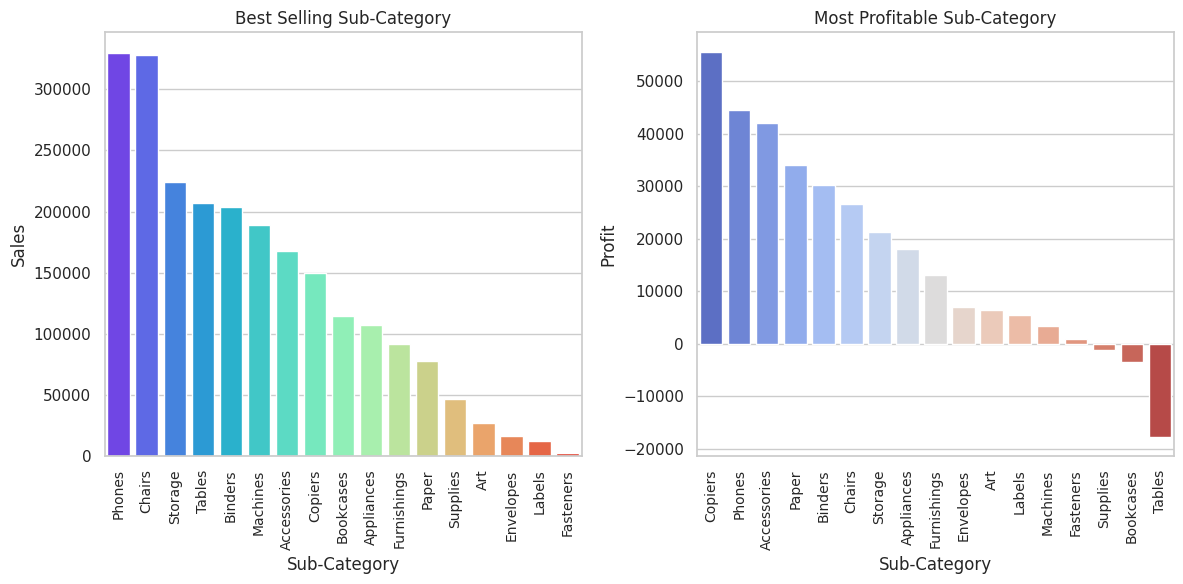

In [ ]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

The analysis of the bar plots shows some important things about the sales and profits of the Super Store's different sub-categories.

**1. Best Selling Sub-Categories**
>The bar plots show that the two best-selling sub-categories are Phones and Chairs. Customers want these goods a lot, which points to a profitable market opportunity. The marketing plan should keep putting an emphasis on these subcategories to take advantage of how popular they are and boost sales.

**2. Profitable Sub-Categories**
>Copiers stand out as the most valuable product in the subcategories because they make the most money. Phones, accessories, papers, and binders all make a big difference in the total profit. To make more money overall, the marketing plan needs to focus on promoting these products and making the most of their sales potential.

**3. Low Margin orUnprofitable Products**
>On the other hand, the bar plots show that Machines, Fasteners, Supplies, Bookcases, and Tables make very little money or even lose money. For these goods, the Super Store should think about taking the following steps:
  >>**Dropping from Product Catalog:** The Super Store may decide to stop selling these low-performing items, especially if they regularly lose money.
>
>>**Negotiate for a lower price from the supplier:** If the Super Store wants to keep selling these goods, negotiating with the supplier for a lower price could help the store make more money.



## **Which Region is the Most Profitable?**



In [ ]:
df5 = pd.DataFrame(data.groupby(['Region'])['Profit'].sum().reset_index())

df5

Region       Profit
0  Central   39655.8752
1     East   91506.3092
2    South   46749.4303
3     West  108329.8079

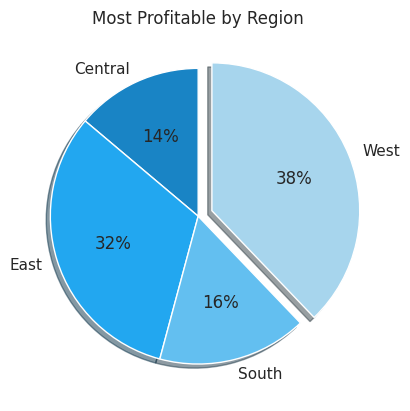

In [ ]:
explode = [0, 0, 0, 0.1]
colors = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed"]
plt.pie(df5.Profit, labels = df5.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True,colors=colors)

plt.title("Most Profitable by Region")

plt.show()

Based on the information given, the following can be said about the profitability of different regions:

- Central: 14%
- West: 38%
- East: 32%
- South: 16%

>From these numbers, it's clear that the **West** is the most profitable area, with a **38%** share. After that comes the **East area**, which has a significant **32%** of the profit.

>On the other hand, **14%** of profits come from the **Central area**, which is a much smaller share. Last but not least, **16%** of the general profit comes from the **South**.

So, the analysis shows that both the East and West are the most profitable areas, with the West being the most profitable. Based on these results, it seems like putting resources and business operations in these two areas could bring in the most money.

# **Conclusion**
we have been given the task of conducting an Exploratory Data Analysis (EDA) on the "SampleSuperstore" dataset. The objective of this analysis is to identify areas that need improvement in order to increase profits and identify weak points in the sales department to boost sales. Based on the information gathered during the data analysis, we can then implement appropriate techniques to address these issues and improve overall business performance.






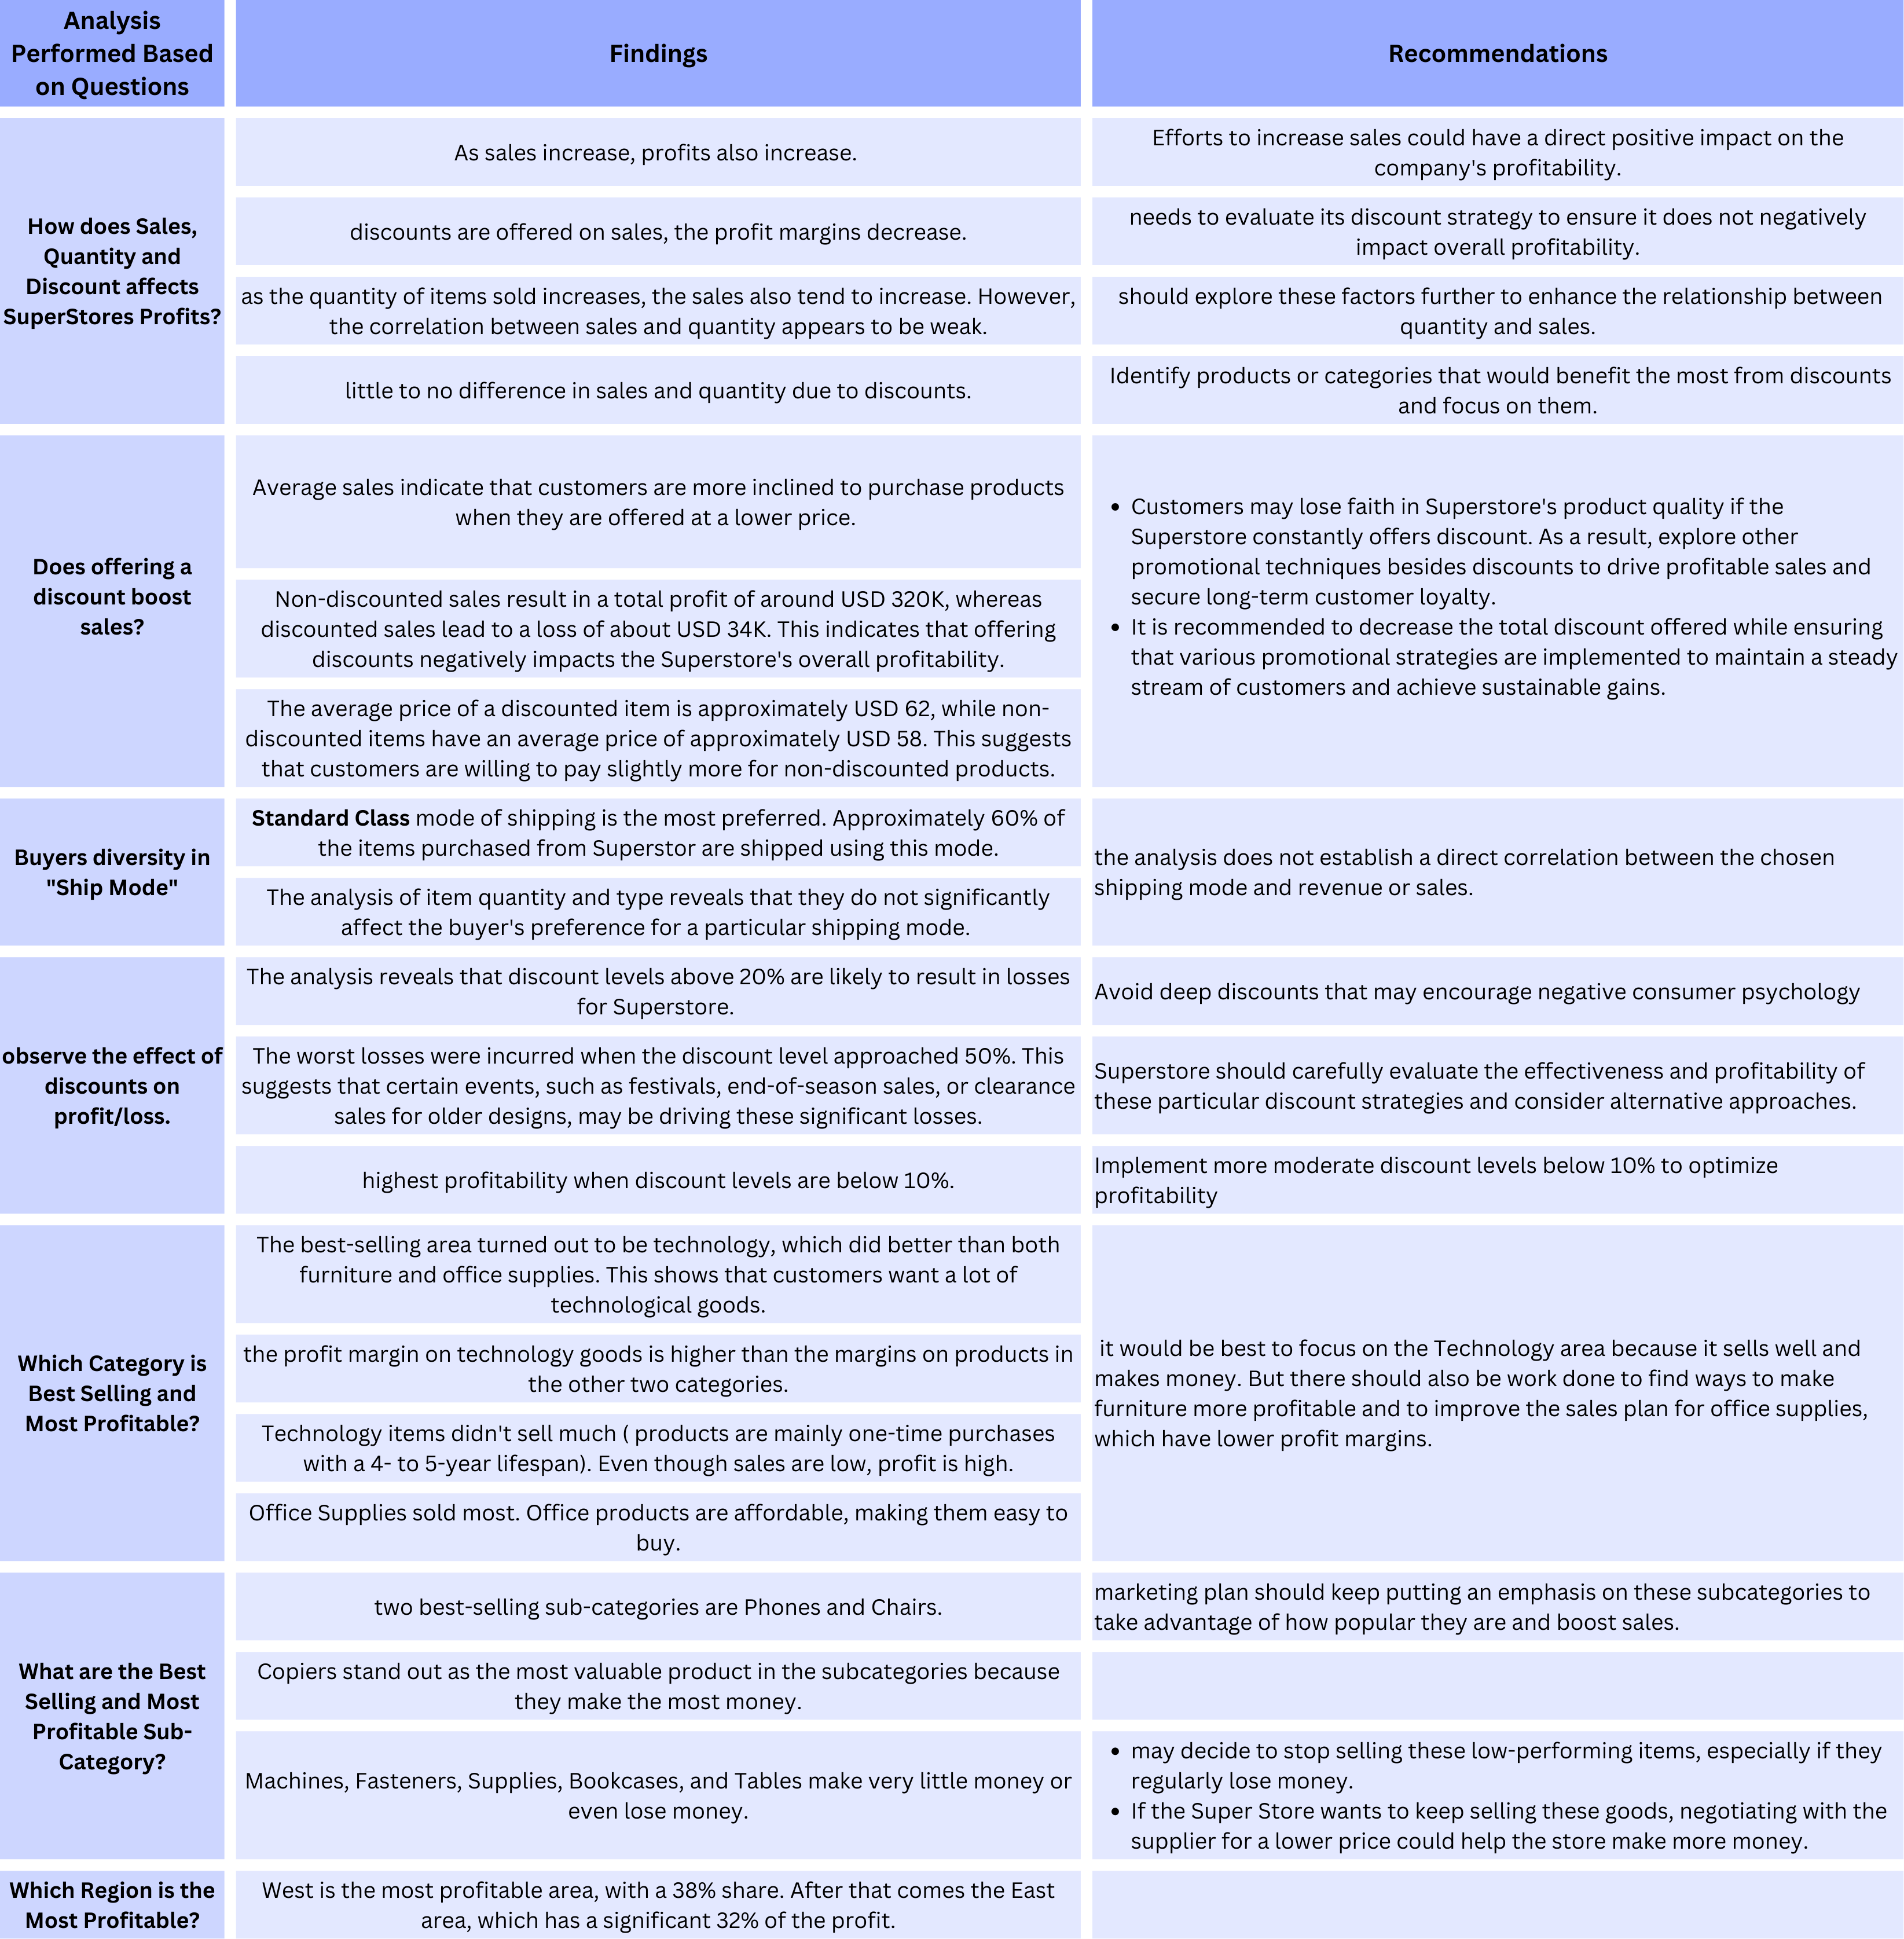

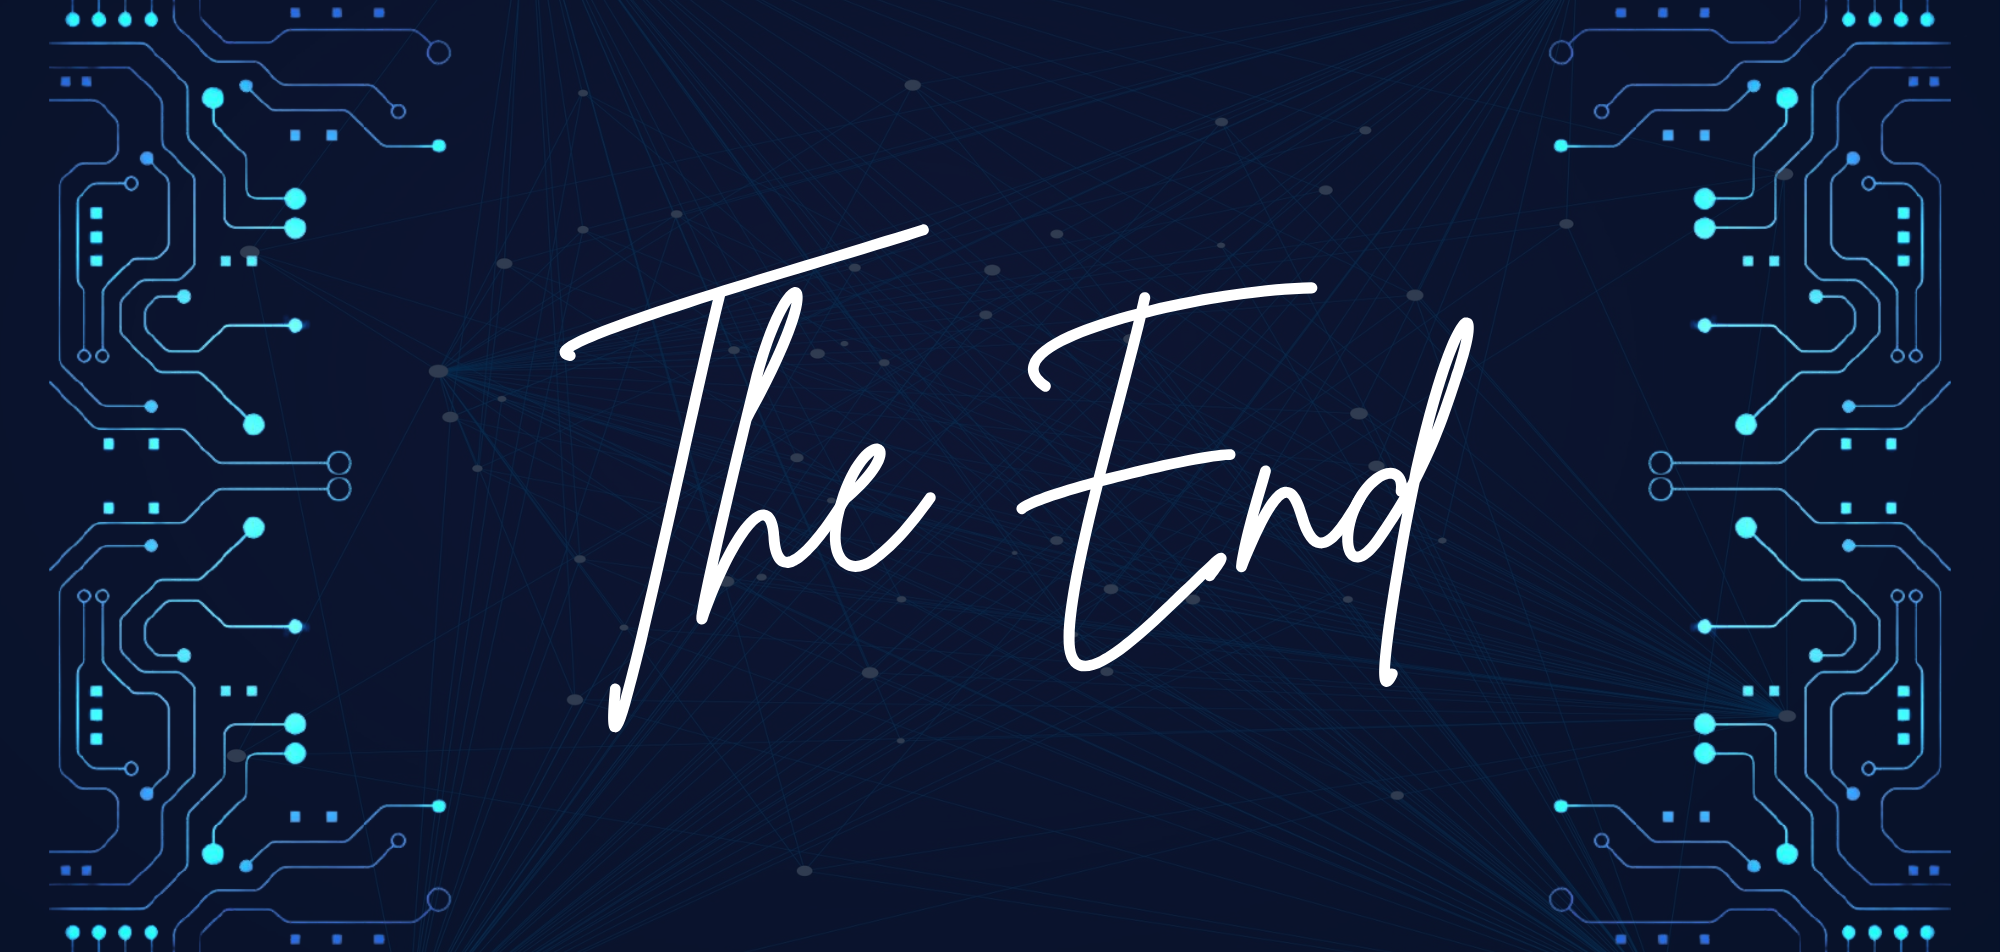